# Application of `pyheatmy.frequency` to real data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the frequency module

In [66]:
from pyheatmy.frequency import frequency_analysis
fa_1 = frequency_analysis()
fa_2 = frequency_analysis()
fa_3 = frequency_analysis()

Frequency analysis module initialized.
This module will analyze a multi-periodic signal to estimate attenuation and phase decay coefficients.
Using phase decay and amplitude attenuation with depth, we'll retrieve kappa_e and v_t for each dominant period.
-------------------------------------
Please use set_inputs(...) to provide the necessary data before analysis.
Frequency analysis module initialized.
This module will analyze a multi-periodic signal to estimate attenuation and phase decay coefficients.
Using phase decay and amplitude attenuation with depth, we'll retrieve kappa_e and v_t for each dominant period.
-------------------------------------
Please use set_inputs(...) to provide the necessary data before analysis.
Frequency analysis module initialized.
This module will analyze a multi-periodic signal to estimate attenuation and phase decay coefficients.
Using phase decay and amplitude attenuation with depth, we'll retrieve kappa_e and v_t for each dominant period.
-----------

In [67]:
data_folder = './agnes_data/'
# Load the dat files in data_folder
E_chargeT_riv = pd.read_csv(data_folder + 'E_chargeT_riv.dat', header=None)
E_tempT_riv = pd.read_csv(data_folder + 'E_tempT_riv.dat', header=None)
S_charge_40cm_dt = pd.read_csv(data_folder + 'S_charge_40cm_dt.dat', header=None, delimiter=r'\s+')
S_temp_PT100_t = pd.read_csv(data_folder + 'S_temp_PT100_t.dat', header=None, delimiter=r'\s+')

In [70]:
charge_riv = np.array(E_chargeT_riv.values)
charge_capteur_1 = np.array(S_charge_40cm_dt[1].values)
charge_capteur_2 = np.array(S_charge_40cm_dt[2].values)

In [71]:
time = S_temp_PT100_t[0].values  # assuming first column is time
time = np.array(time, dtype=np.float64)  # ensure time is float64 for precision
# Time in hours: 
time_hours = time / 3600.0

Quick safety plot

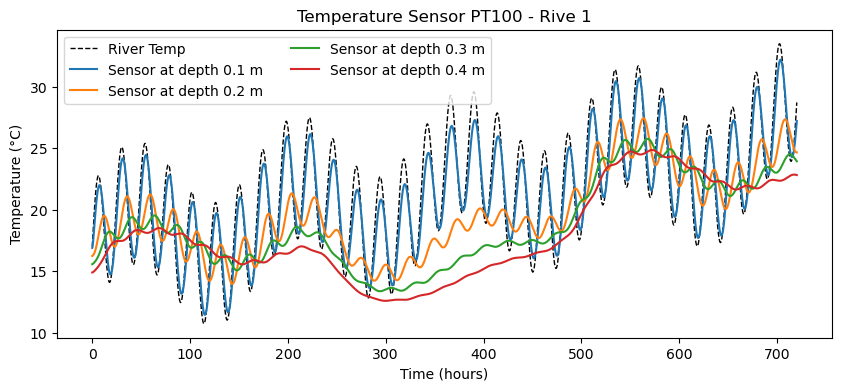

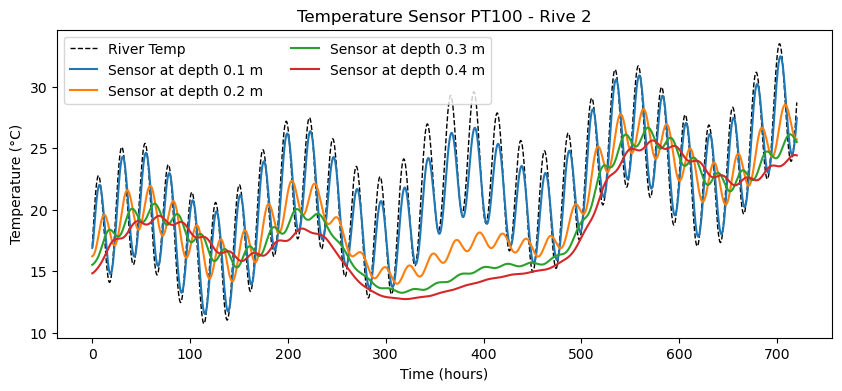

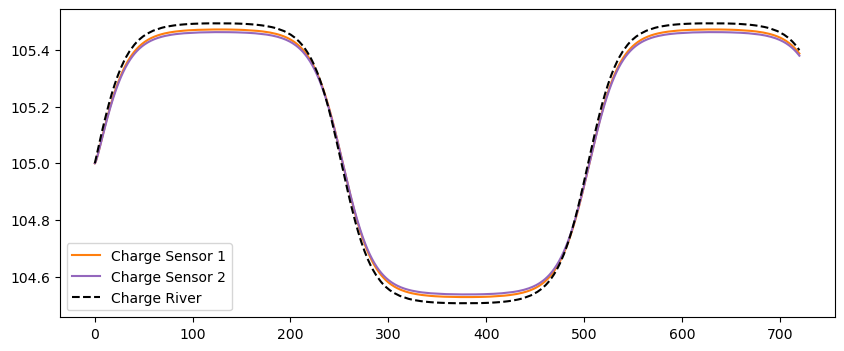

In [72]:
plt.figure(figsize=(10, 4))

# Add river signal
plt.plot(time_hours, E_tempT_riv[0].values, label='River Temp', color='black', linewidth=1, linestyle='--')

depths = [0.1, 0.2, 0.3, 0.4]

for i in range(1, 5):
    plt.title(f'Temperature Sensor PT100 - Rive 1')
    plt.xlabel('Time (hours)')
    plt.ylabel('Temperature (°C)')
    plt.plot(time_hours, S_temp_PT100_t[i].values, label=f'Sensor at depth {depths[i-1]} m')

plt.legend(ncols=2)

plt.figure(figsize=(10, 4))

# Add river signal
plt.plot(time_hours, E_tempT_riv[0].values, label='River Temp', color='black', linewidth=1, linestyle='--')

depths = [0.1, 0.2, 0.3, 0.4]

for i in range(5, 9):
    plt.title(f'Temperature Sensor PT100 - Rive 2')
    plt.xlabel('Time (hours)')
    plt.ylabel('Temperature (°C)')
    plt.plot(time_hours, S_temp_PT100_t[i].values, label=f'Sensor at depth {depths[i-5]} m')


plt.legend(ncols=2)

# Charge
plt.figure(figsize=(10, 4))
plt.plot(time_hours, charge_capteur_1, label='Charge Sensor 1', color='tab:orange')
plt.plot(time_hours, charge_capteur_2, label='Charge Sensor 2', color='tab:purple')
plt.plot(time_hours, charge_riv, label='Charge River', color='black', linestyle='--')
plt.legend()

Now try to launch frequential analysis.

In [74]:
river_signal = np.array(E_tempT_riv[0].values)
signals_1 = [S_temp_PT100_t[i].values for i in range(1, 5)]
signals_1 = [river_signal] + [np.array(sig) for sig in signals_1]

signals_2 = [S_temp_PT100_t[i].values for i in range(5, 9)]
signals_2 = [river_signal] + [np.array(sig) for sig in signals_2]

dates = pd.to_datetime(time, unit='s')

depth_sensors = [0.1, 0.2, 0.3, 0.4, 1]

depths = [0.0] + list(depth_sensors)
signals_1 = np.array(signals_1)
signals_2 = np.array(signals_2)

In [75]:
s_crop1 = signals_1[:, :1500]
s_crop2 = signals_1[:, 1500:3000]
s_crop3 = signals_1[:, 3000:]

d_crop1 = dates[:1500]
d_crop2 = dates[1500:3000]
d_crop3 = dates[3000:]

In [76]:
fa_1.set_inputs(signals=s_crop1, dates=d_crop1, depths=depths[:-1])
fa_2.set_inputs(signals=s_crop2, dates=d_crop2, depths=depths[:-1])
fa_3.set_inputs(signals=s_crop3, dates=d_crop3, depths=depths[:-1])


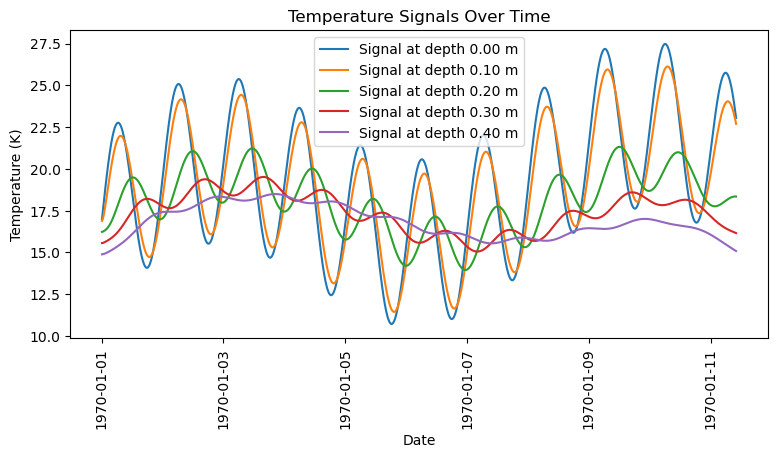

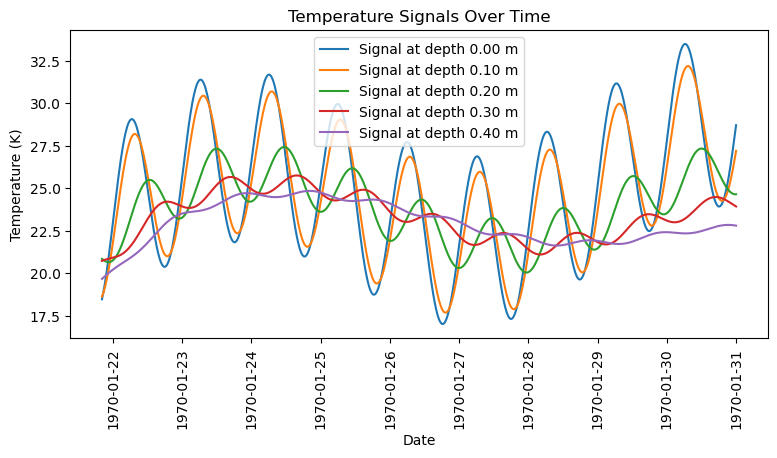

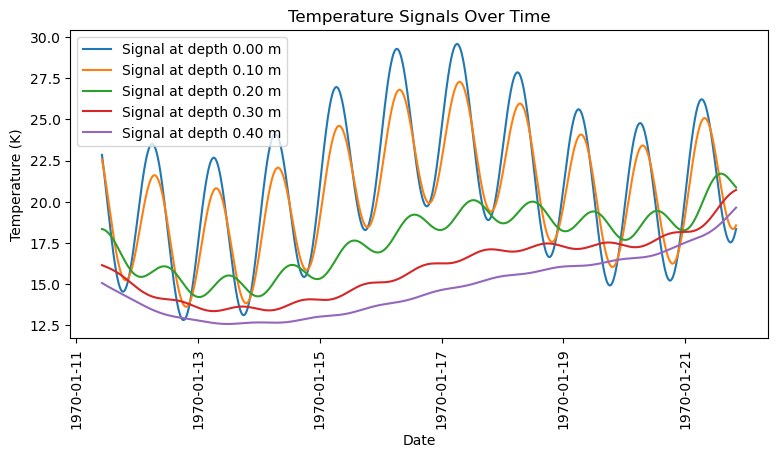

In [77]:
fa_1.plot_signals()
fa_3.plot_signals()
fa_2.plot_signals()

/Users/noedaniel/Desktop/MOLONARI/MOLONARI1D/pyheatmy/pyheatmy/frequency.py:447: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1.0 / (freqs * 86400.0), amp, label=f'Sensor at depth {depths[i]} m')


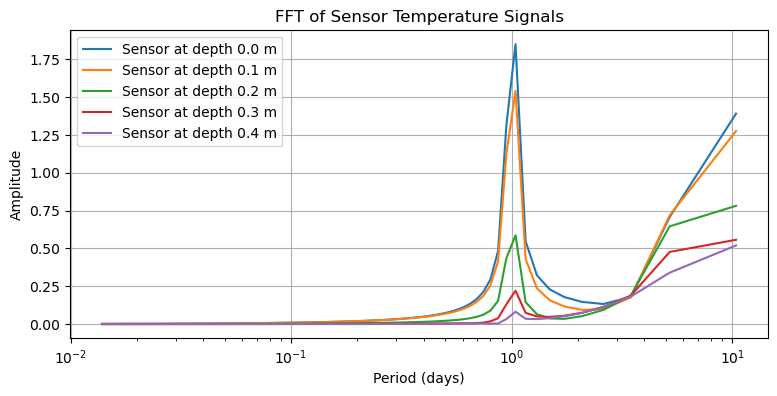

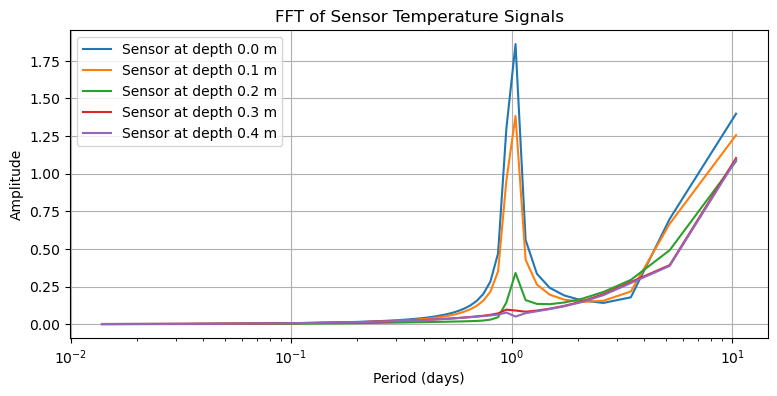

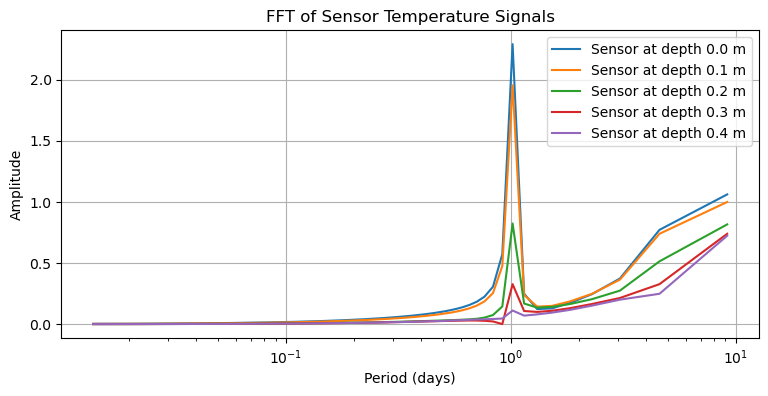

In [78]:
fa_1.fft_sensors()
fa_2.fft_sensors()
fa_3.fft_sensors()

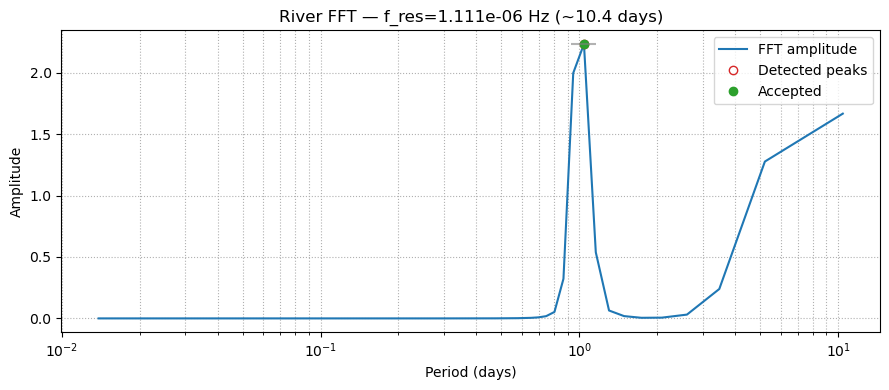

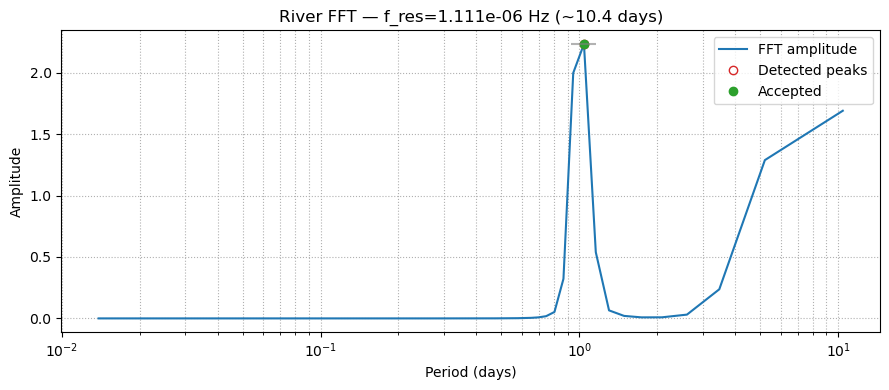

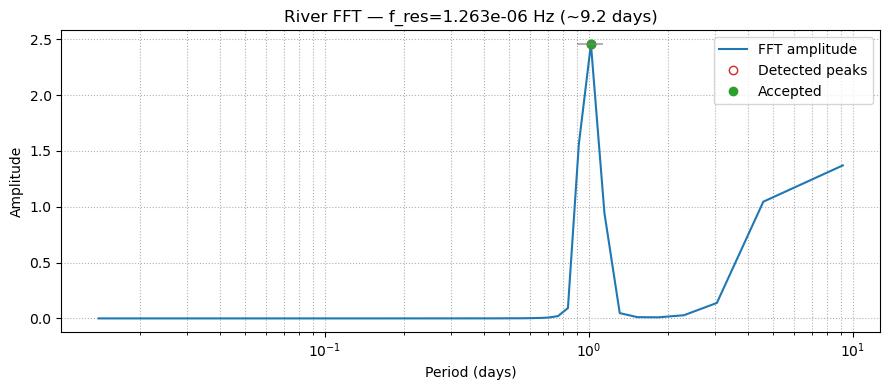

In [80]:
Pd_1, f0_1, A0_1, meta_1 = fa_1.find_dominant_periods(store=True, compute_phases=True, Q_min=3, max_width_rel=1)
Pd_2, f0_2, A0_2, meta_2 = fa_2.find_dominant_periods(store=True, compute_phases=True, Q_min=3, max_width_rel=1)
Pd_3, f0_3, A0_3, meta_3 = fa_3.find_dominant_periods(store=True, compute_phases=True, Q_min=3, max_width_rel=1)

This deals only with 1D attenuation (no lateral flow).
Detected depths: [0.  0.1 0.2 0.3 0.4]
Amplitudes at dominant periods for each signal computed.
Period 1.04 days: Amplitudes = [1.84883164 1.53989942 0.58629603 0.22087307 0.08226273]


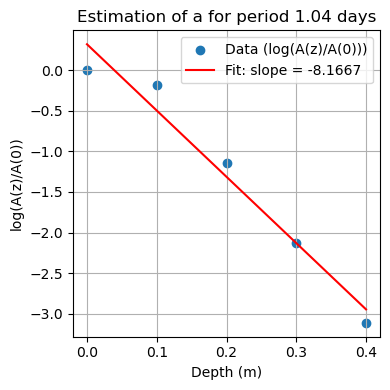

Attenuation coefficients a estimated for each dominant period.
Period 1.04 days: a = 8.1667 1/m
Period 1.04 days: R^2 = 0.9631


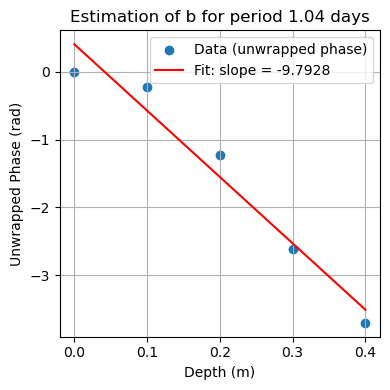

Phase decay coefficients b estimated for each dominant period.
Period 1.04 days: b = 9.7928 rad/m
Period 1.04 days: R^2 = 0.9560
Inversion complete.
Period 1.04 days: kappa_e = 3.581e-07 m^2/s, v_t = 1.280e-06 m/s


In [81]:
a_est_1, a_R2_1 = fa_1.estimate_a(draw=True)     # lit dates/signals/depths/Pd depuis le state
b_est_1, b_R2_1 = fa_1.estimate_b(draw=True)                    # idem
kappa_e_1, v_t_1 = fa_1.perform_inversion(verbose=True)         # lit a,b,Pd du state

This deals only with 1D attenuation (no lateral flow).
Detected depths: [0.  0.1 0.2 0.3 0.4]
Amplitudes at dominant periods for each signal computed.
Period 1.04 days: Amplitudes = [1.8609839  1.38409269 0.34090257 0.09121791 0.05118037]


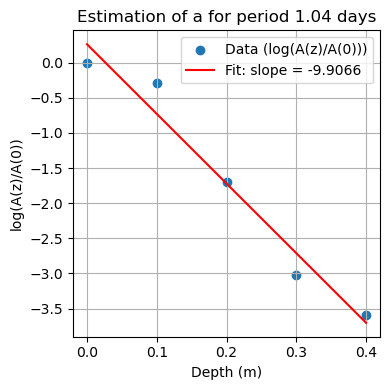

Attenuation coefficients a estimated for each dominant period.
Period 1.04 days: a = 9.9066 1/m
Period 1.04 days: R^2 = 0.9645


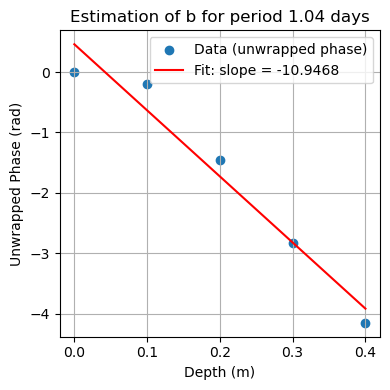

Phase decay coefficients b estimated for each dominant period.
Period 1.04 days: b = 10.9468 rad/m
Period 1.04 days: R^2 = 0.9576
Inversion complete.
Period 1.04 days: kappa_e = 2.898e-07 m^2/s, v_t = 6.347e-07 m/s


In [82]:
a_est_2, a_R2_2 = fa_2.estimate_a(draw=True)     # lit dates/signals/depths/Pd depuis le state
b_est_2, b_R2_2 = fa_2.estimate_b(draw=True)                    # idem
kappa_e_2, v_t_2 = fa_2.perform_inversion(verbose=True)         # lit a,b,Pd du state

This deals only with 1D attenuation (no lateral flow).
Detected depths: [0.  0.1 0.2 0.3 0.4]
Amplitudes at dominant periods for each signal computed.
Period 1.02 days: Amplitudes = [2.28987279 1.95329079 0.82359955 0.32769552 0.11231435]


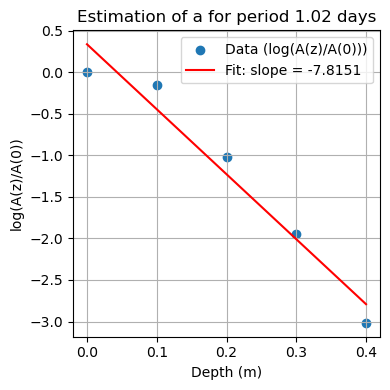

Attenuation coefficients a estimated for each dominant period.
Period 1.02 days: a = 7.8151 1/m
Period 1.02 days: R^2 = 0.9544


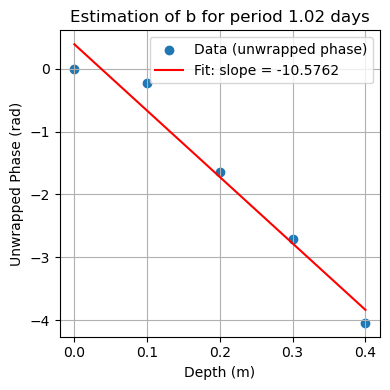

Phase decay coefficients b estimated for each dominant period.
Period 1.02 days: b = 10.5762 rad/m
Period 1.02 days: R^2 = 0.9649
Inversion complete.
Period 1.02 days: kappa_e = 3.051e-07 m^2/s, v_t = 1.982e-06 m/s


In [83]:
a_est_3, a_R2_3 = fa_3.estimate_a(draw=True)     # lit dates/signals/depths/Pd depuis le state
b_est_3, b_R2_3 = fa_3.estimate_b(draw=True)                    # idem
kappa_e_3, v_t_3 = fa_3.perform_inversion(verbose=True)         # lit a,b,Pd du state

### Checking for 2D hypothesis

In [84]:
#from pyheatmy.frequency2D import TwoDTester, TwoDConfig
from pyheatmy.frequency2D_upd import TwoDConfig, decide_for_fa_period

Check if 2D or 1D model using statistical tests.

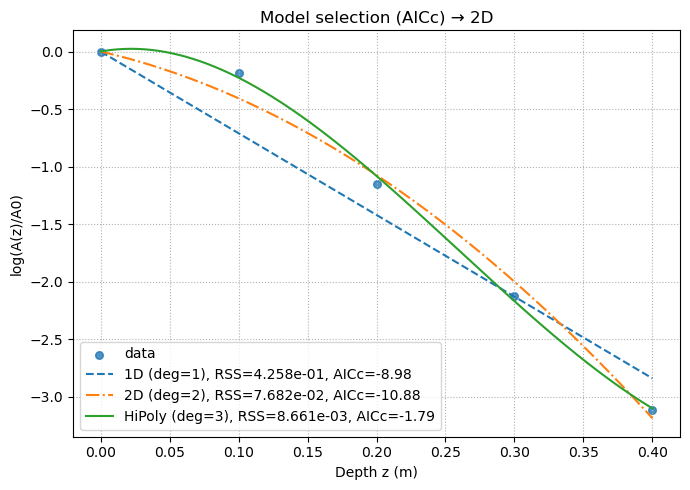

Best model according to criterias : 2D
AICc: -8.982242319913786 -10.878691056753045 -1.7916313950545195
p_LRT 1 vs 2: 0.0642066704967057  | p_LRT 2 vs H: 0.036680690977024755


In [85]:
tester_cfg = TwoDConfig(through_origin=True, alpha_lrt=0.05)
dec = decide_for_fa_period(fa_1, period_index=0, config=tester_cfg, show_plot=True)
print("Best model according to criterias :", dec.which)
print("AICc:", dec.metrics["aicc_deg1"], dec.metrics["aicc_deg2"], dec.metrics["aicc_degh"])
print("p_LRT 1 vs 2:", dec.metrics["p_LRT_1_vs_2"], " | p_LRT 2 vs H:", dec.metrics["p_LRT_2_vs_H"])

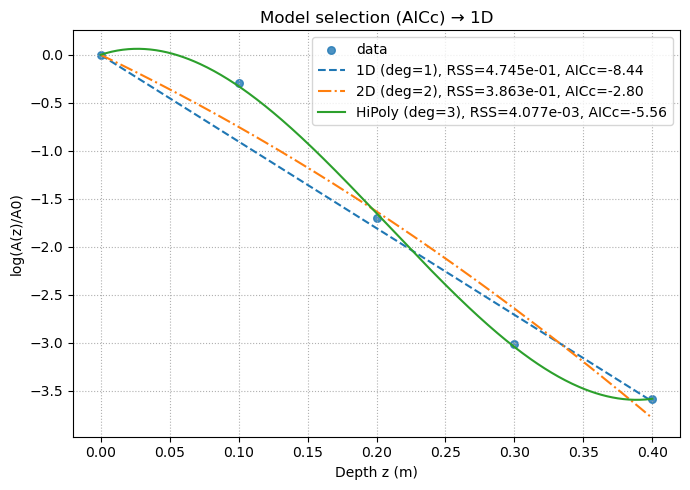

Best model according to criterias : 1D
AICc: -8.440954131068453 -2.8026314648787007 -5.558799361653726
p_LRT 1 vs 2: 0.521291371966891  | p_LRT 2 vs H: 0.0025526494716885395


In [86]:
tester_cfg = TwoDConfig(through_origin=True, alpha_lrt=0.05)
dec = decide_for_fa_period(fa_2, period_index=0, config=tester_cfg, show_plot=True)
print("Best model according to criterias :", dec.which)
print("AICc:", dec.metrics["aicc_deg1"], dec.metrics["aicc_deg2"], dec.metrics["aicc_degh"])
print("p_LRT 1 vs 2:", dec.metrics["p_LRT_1_vs_2"], " | p_LRT 2 vs H:", dec.metrics["p_LRT_2_vs_H"])

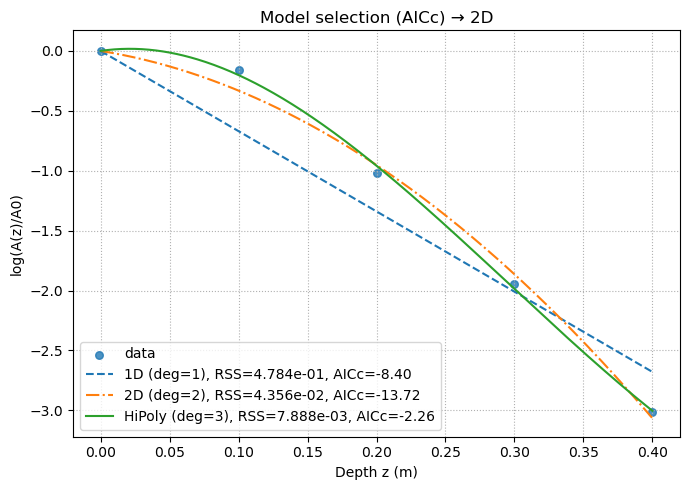

Best model according to criterias : 2D
AICc: -8.400089959170828 -13.715816457372071 -2.2590489035075336
p_LRT 1 vs 2: 0.028576323437445317  | p_LRT 2 vs H: 0.06451672544749765


In [87]:
tester_cfg = TwoDConfig(through_origin=True, alpha_lrt=0.05)
dec = decide_for_fa_period(fa_3, period_index=0, config=tester_cfg, show_plot=True)
print("Best model according to criterias :", dec.which)
print("AICc:", dec.metrics["aicc_deg1"], dec.metrics["aicc_deg2"], dec.metrics["aicc_degh"])
print("p_LRT 1 vs 2:", dec.metrics["p_LRT_1_vs_2"], " | p_LRT 2 vs H:", dec.metrics["p_LRT_2_vs_H"])